In [ ]:
require('rstan')
require('tidyverse')
require('loo')

In [ ]:
SIM.DIR <- "../../../data/vary_priors_sim2/"

In [ ]:
source("../model_utils.R")

In [16]:
# grab all the M1 fit data
list_fit_f <- list.files(path=SIM.DIR, pattern="m1_fit")
list_fit_res <- lapply(list_fit_f[1:3], 
       function(my_f){
           print(my_f)
           load(sprintf("%s/%s", SIM.DIR, my_f))
           fit_summ <- summary(fit, pars=c("Sigma", "pi", "Omegacor"))$summary
           return(fit_summ)
       })
names(list_fit_obj) <- list_fit_f




In [ ]:
# now that we are grabbing all of these we will need to rotate --> put into one data frame for analysis

In [ ]:
## // TODO: double check the fit output in terms of rhat

# for each model:
# S, p, rg estimates and CIs
#  Rhat, n_eff
#  loo


In [9]:
load(sprintf("%s/m1_fit_1.RData", SIM.DIR))
my_dat <- print(fit, pars=c("Sigma", "Omegacor", "pi", "lp__"), digits=5)
# note this is slow b/c of loglik inclusion

Inference for Stan model: m1_1.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                     mean se_mean      sd        2.5%         25%         50%
Sigma[1,1]        0.00122 0.00000 0.00006     0.00110     0.00118     0.00122
Sigma[1,2]        0.00048 0.00000 0.00004     0.00041     0.00046     0.00048
Sigma[2,1]        0.00048 0.00000 0.00004     0.00041     0.00046     0.00048
Sigma[2,2]        0.00102 0.00000 0.00005     0.00093     0.00099     0.00102
Omegacor[1,1]     1.00000     NaN 0.00000     1.00000     1.00000     1.00000
Omegacor[1,2]     0.43197 0.00051 0.02752     0.37951     0.41357     0.43217
Omegacor[2,1]     0.43197 0.00051 0.02752     0.37951     0.41357     0.43217
Omegacor[2,2]     1.00000 0.00000 0.00000     1.00000     1.00000     1.00000
pi[1]             0.79887 0.00013 0.00719     0.78475     0.79393     0.79887
pi[2]             0.20113 0.00013 0.00719     0.18714     0.19632     

In [ ]:
# turn this into a table that we write out

# then deal w plotting later

In [26]:
list_fit_f

[1] "m1_fit_1.RData"  "m1_fit_10.RData" "m1_fit_11.RData" "m1_fit_12.RData"
 [5] "m1_fit_13.RData" "m1_fit_14.RData" "m1_fit_2.RData"  "m1_fit_3.RData" 
 [9] "m1_fit_4.RData"  "m1_fit_5.RData"  "m1_fit_6.RData"  "m1_fit_7.RData" 
[13] "m1_fit_8.RData"  "m1_fit_9.RData"

In [27]:

getOutput <- function(idx){
    load(sprintf("%s/m1_fit_%s.RData", SIM.DIR, idx))
    my_summary <- summary(fit, pars=c("Sigma", "pi", "Omegacor"))$summary
    fit_title <- sprintf("m1_%s", idx)

    my_summary2 <- data.frame(my_summary)
    my_summary2$parameter <- rownames(my_summary2)

    my_summary_res <- my_summary2 %>% 
    select(c("parameter", "X2.5.", "X50.", "X97.5.", "n_eff", "Rhat")) %>%
    rename(ci_l="X2.5.", est="X50.", ci_h="X97.5.") %>%
    mutate(fit_params=fit_title)
    return(my_summary_res)
}

    

In [31]:
output3 <- lapply(1:14, getOutput)

In [30]:
do.call(rbind,output2)

parameter,ci_l,est,ci_h,n_eff,Rhat,fit_params
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
"Sigma[1,1]",0.0011020971,0.0012156559,0.0013323734,3454.156,0.9999929,m1_1
"Sigma[1,2]",0.0004110183,0.0004819447,0.0005606204,2805.941,0.9994784,m1_1
"Sigma[2,1]",0.0004110183,0.0004819447,0.0005606204,2805.941,0.9994784,m1_1
"Sigma[2,2]",0.0009280887,0.0010231430,0.0011274067,3371.578,0.9994398,m1_1
pi[1],0.7847533898,0.7988739212,0.8128558103,3304.269,0.9999995,m1_1
pi[2],0.1871441897,0.2011260788,0.2152466102,3304.269,0.9999995,m1_1
"Omegacor[1,1]",1.0000000000,1.0000000000,1.0000000000,NaN,NaN,m1_1
"Omegacor[1,2]",0.3795137802,0.4321721594,0.4854591490,2969.383,1.0001666,m1_1
"Omegacor[2,1]",0.3795137802,0.4321721594,0.4854591490,2969.383,1.0001666,m1_1


In [11]:
# load all of the simulated data
#  compare the loo, waic across all of them


load("../../../data/vary_priors_sim/loo_m1_1.RData")
load("../../../data/vary_priors_sim/waic_m1_1.RData")

ls()

[1] "fit"   "fit0"  "fit1"  "fit2"  "loo1"  "waic1"

In [23]:
list_loo_f <- list.files(path=SIM.DIR, pattern="loo")
list_loo_obj <- lapply(list_loo_f, 
       function(my_f){
           load(sprintf("%s/%s", SIM.DIR, my_f))
           return(loo1)
       })
names(list_loo_obj) <- list_loo_f

list_waic_f <- list.files(path=SIM.DIR, pattern="waic")
list_waic_obj <- lapply(list_waic_f, 
       function(my_f){
           load(sprintf("%s/%s", SIM.DIR, my_f))
           return(waic1)
       })
names(list_waic_obj) <- list_waic_f

list_fit_f <- list.files(path=SIM.DIR, pattern="m*_fit")
list_fit_obj <- lapply(list_fit_f, 
       function(my_f){
           load(sprintf("%s/%s", SIM.DIR, my_f))
           return(fit)
       })
names(list_fit_obj) <- list_fit_f


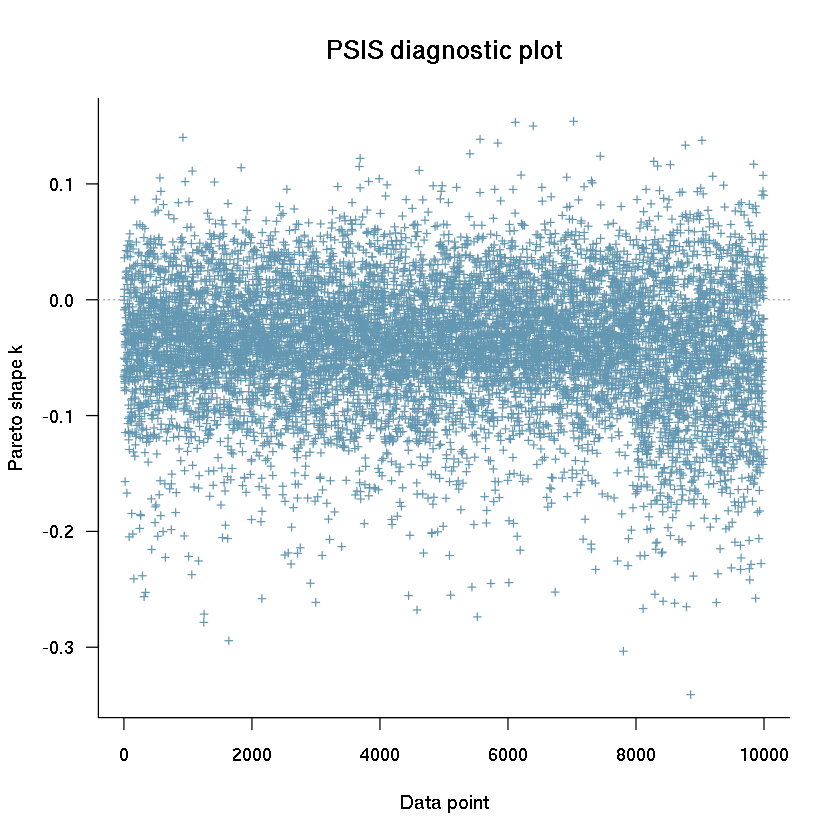

In [24]:
plot(list_loo_obj[[1]]) 
# this looks good, we dont want to see too high values

In [25]:
require('loo')

Loading required package: loo

This is loo version 2.2.0

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but we recommend using as many as possible. Use the 'cores' argument or set options(mc.cores = NUM_CORES) for an entire session. 


Attaching package: ‘loo’


The following object is masked from ‘package:rstan’:

    loo




In [40]:
loo_compare(list_loo_obj)


,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
loo_m1_3.RData,0.00000,0.0000,47663.92,152.6667,3.754856,0.1972565,-95327.85,305.3333
loo_m1_1.RData,-37.71792,187.2692,47626.21,157.3792,4.126928,0.2670019,-95252.41,314.7583
loo_m1_8.RData,-113.98661,184.7764,47549.94,155.1030,3.922037,0.2114566,-95099.88,310.2061
loo_m1_4.RData,-116.31257,189.5099,47547.61,156.3811,3.723046,0.2082178,-95095.22,312.7623
loo_m1_13.RData,-195.72033,185.8861,47468.20,155.4631,3.893763,0.2275790,-94936.41,310.9261
loo_m0_3.RData,-205.57694,187.4435,47458.35,155.7897,3.999237,0.2155820,-94916.69,311.5794
loo_m1_2.RData,-272.31502,187.1737,47391.61,153.8001,3.642684,0.1950254,-94783.22,307.6002
loo_m1_6.RData,-314.11347,186.0332,47349.81,155.7419,3.802707,0.1833879,-94699.62,311.4839
loo_m1_7.RData,-323.54211,185.3759,47340.38,155.0110,4.057012,0.2476234,-94680.76,310.0220
loo_m1_9.RData,-352.05674,186.4998,47311.87,155.9351,4.107808,0.2239865,-94623.74,311.8702


In [27]:
list_loo_obj[[1]]
list_loo_obj[[2]]


Computed from 1600 by 10000 log-likelihood matrix

         Estimate    SE
elpd_loo  47458.3 155.8
p_loo         4.0   0.2
looic    -94916.7 311.6
------
Monte Carlo SE of elpd_loo is 0.1.

All Pareto k estimates are good (k < 0.5).
See help('pareto-k-diagnostic') for details.


Computed from 1600 by 10000 log-likelihood matrix

         Estimate    SE
elpd_loo  47626.2 157.4
p_loo         4.1   0.3
looic    -95252.4 314.8
------
Monte Carlo SE of elpd_loo is 0.1.

All Pareto k estimates are good (k < 0.5).
See help('pareto-k-diagnostic') for details.

In [38]:
lpd_est <- list_loo_obj[[1]]$estimates["elpd_loo",]
lpd_est[[2]]

[1] 155.7897

In [51]:
res <- loo_compare(list_loo_obj)
res2 <- data.frame(res)

In [54]:
res2

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
loo_m1_3.RData,0.00000,0.0000,47663.92,152.6667,3.754856,0.1972565,-95327.85,305.3333
loo_m1_1.RData,-37.71792,187.2692,47626.21,157.3792,4.126928,0.2670019,-95252.41,314.7583
loo_m1_8.RData,-113.98661,184.7764,47549.94,155.1030,3.922037,0.2114566,-95099.88,310.2061
loo_m1_4.RData,-116.31257,189.5099,47547.61,156.3811,3.723046,0.2082178,-95095.22,312.7623
loo_m1_13.RData,-195.72033,185.8861,47468.20,155.4631,3.893763,0.2275790,-94936.41,310.9261
loo_m0_3.RData,-205.57694,187.4435,47458.35,155.7897,3.999237,0.2155820,-94916.69,311.5794
loo_m1_2.RData,-272.31502,187.1737,47391.61,153.8001,3.642684,0.1950254,-94783.22,307.6002
loo_m1_6.RData,-314.11347,186.0332,47349.81,155.7419,3.802707,0.1833879,-94699.62,311.4839
loo_m1_7.RData,-323.54211,185.3759,47340.38,155.0110,4.057012,0.2476234,-94680.76,310.0220


In [58]:
res2$fit_name <- rownames(res2)

res3 <- res2 %>% select(fit_name, elpd_diff, se_diff ) %>%
mutate(fit_name=str_replace_all(fit_name, "loo\\_|\\.RData", "")) %>%
mutate(fit_name=factor(fit_name, levels=fit_name))

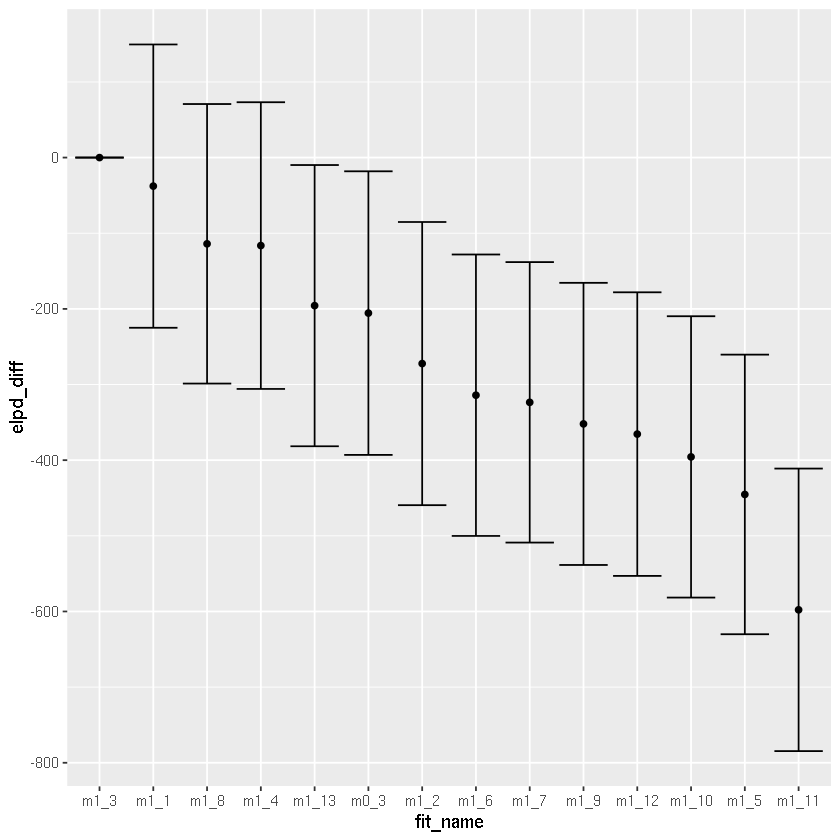

In [61]:
ggplot(res3, aes(x=fit_name, y=elpd_diff))+geom_point()+
geom_errorbar(aes(ymin=elpd_diff-se_diff, ymax=elpd_diff+se_diff))

In [60]:
# plot all the ELPD

In [ ]:
# plot the fits for each


